## Importing Libraries

In [1]:
import re
import csv
import nltk
import spacy
import numpy as np 
import pandas as pd
import contractions
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tqdm.notebook import tqdm
from nltk.corpus import stopwords

## Loading Dataset

In [ ]:
# Reading data from text
with open('train_snli.txt') as file:
    data = file.readlines()
    
# preparing csv file
with open('data.csv', 'w', newline= '') as csvfile:
    filenames = ['source_txt', 'plagiarism_txt', 'label']
    writer = csv.DictWriter(csvfile, fieldnames=filenames)
    
    writer.writeheader()
    for line in tqdm(data):
        parts = line.strip().split('\t')
        source_txt = parts[0]
        plagiarishm_txt = parts[1]
        label = int(parts[2])
        
        writer.writerow({
            'source_txt' : source_txt,
            'plagiarism_txt' : plagiarishm_txt,
            'label' : label
        })
print('CSV file created successfully...')

  0%|          | 0/367373 [00:00<?, ?it/s]

CSV file created successfully...


## Checking Sample

In [3]:
df = pd.read_csv("data.csv")
df.sample(5)

,source_txt,plagiarism_txt,label
221337,Man red jacket wears an apron and stands again...,A man sits at a booth in a busy resturant.,0
316098,"A guy about to hit another guy with a hammer, ...",A guy is using a hammer.,1
37246,Houston Astros pitcher number 22 prepares to t...,The pitcher has the ball.,1
199883,A young child dressed as little red riding hood.,A kid is wearing a costume.,1
210458,Crowd of people outside with child in center w...,A crowd of people are indoors eating dinner.,0


## Checking shape of data

In [4]:
df.shape

(367373, 3)

## Checking Missing Values

In [5]:
# check for null values
print("Null values",df.isnull().sum())
# remove null values
df.dropna(inplace=True)
# check for null values after removing
print("==============================")
print("Null values after removing :",df.isnull().sum())

Null values source_txt        0
plagiarism_txt    4
label             0
dtype: int64
Null values after removing : source_txt        0
plagiarism_txt    0
label             0
dtype: int64


## Checking Duplicate 

In [6]:
# check for duplicates
print("Duplicates",df.duplicated().sum())
# remove duplicates
df.drop_duplicates(inplace=True)
# check for duplicates after removing
print("==============================")
print("Duplicates after removing :",df.duplicated().sum())

Duplicates 454
Duplicates after removing : 0


## Checking Value count

label
0    183874
1    183041
Name: count, dtype: int64


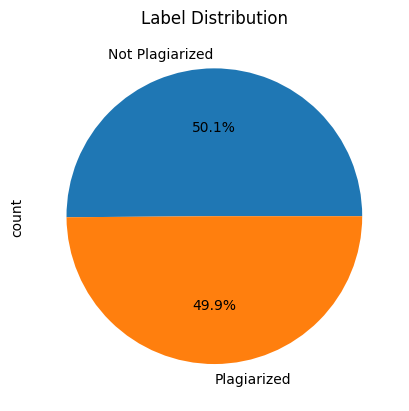

In [7]:
# check value counts
print(df['label'].value_counts())

# Pie Chart
df['label'].value_counts().plot.pie(autopct="%1.1f%%", labels=['Not Plagiarized', 'Plagiarized'])
plt.title('Label Distribution')
plt.show()

## Checking Text Length

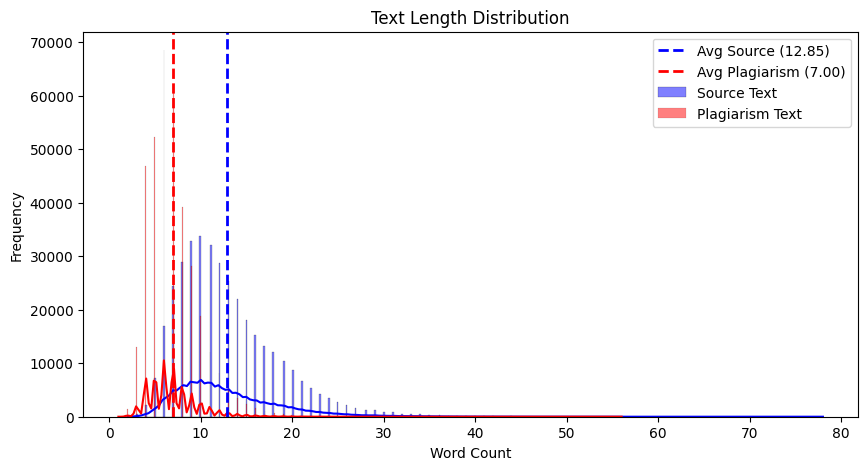

In [8]:
# Calculate source and plagiarism text lengths
df['source_len'] = df['source_txt'].apply(lambda x: len(x.split()))
df['plagiarism_len'] = df['plagiarism_txt'].apply(lambda x: len(x.split()))

# Plot histograms
plt.figure(figsize=(10, 5))
sns.histplot(df['source_len'], color='blue', label='Source Text', kde=True)
sns.histplot(df['plagiarism_len'], color='red', label='Plagiarism Text', kde=True)

# Calculate averages
avg_source_len = df['source_len'].mean()
avg_plagiarism_len = df['plagiarism_len'].mean()

# Add average lines
plt.axvline(avg_source_len, color='blue', linestyle='dashed', linewidth=2, label=f'Avg Source ({avg_source_len:.2f})')
plt.axvline(avg_plagiarism_len, color='red', linestyle='dashed', linewidth=2, label=f'Avg Plagiarism ({avg_plagiarism_len:.2f})')

# Final touches
plt.title('Text Length Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Plotting Word Cloud

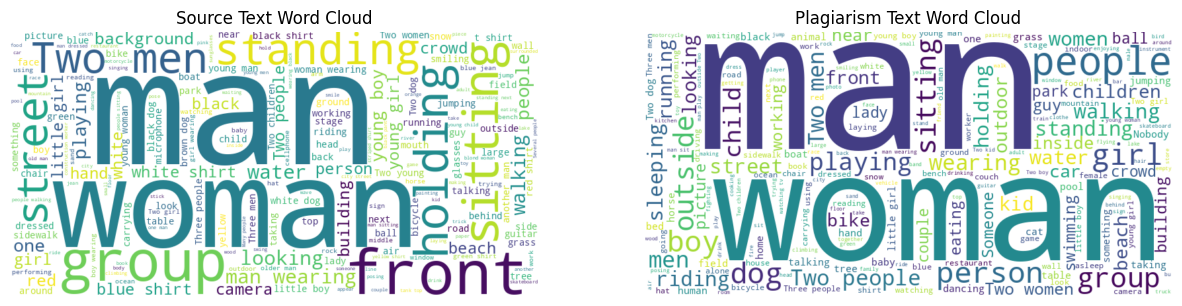

In [9]:
# Generate word cloud for source_txt
source_text = " ".join(df['source_txt'].tolist())
wordcloud_source = WordCloud(width=800, height=400, background_color='white').generate(source_text)

# Generate word cloud for plagiarism_txt
plag_text = " ".join(df['plagiarism_txt'].tolist())
wordcloud_plag = WordCloud(width=800, height=400, background_color='white').generate(plag_text)

# Display the word clouds
plt.figure(figsize=(15, 7))

# Source Text Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_source, interpolation='bilinear')
plt.title('Source Text Word Cloud')
plt.axis('off')

# Plagiarism Text Word Cloud
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_plag, interpolation='bilinear')
plt.title('Plagiarism Text Word Cloud')
plt.axis('off')

plt.show()

## Preprocessing of Text

In [10]:

nltk.download('stopwords')

try:
    nlp = spacy.load('en_core_web_sm')
except OSError:
    print("Downloading SpaCy model...")
    spacy.cli.download("en_core_web_sm")
    nlp = spacy.load('en_core_web_sm')

def to_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

def remove_special_characters(text):
    return re.sub(r'[^A-Za-z\s]', '', text)

def remove_html_tags(text):
    return re.sub(r'<.*?>', '', text)

def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F" 
                               u"\U0001F300-\U0001F5FF" 
                               u"\U0001F680-\U0001F6FF" 
                               u"\U0001F700-\U0001F77F" 
                               u"\U0001F780-\U0001F7FF" 
                               u"\U0001F800-\U0001F8FF" 
                               u"\U0001F900-\U0001F9FF" 
                               u"\U0001FA00-\U0001FA6F" 
                               u"\U0001FA70-\U0001FAFF" 
                               u"\U00002702-\U000027B0" 
                               u"\U000024C2-\U0001F251" 
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text).strip()

def expand_contractions(text):
    return contractions.fix(text)

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    tokens = text.split()
    return " ".join([word for word in tokens if word not in stop_words])

def spacy_tokenization_lemmatization(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc]

def remove_specific_words(text, words_to_remove):
    words = text.split()
    filtered_words = [word for word in words if word not in words_to_remove]
    return " ".join(filtered_words)

def full_pipeline(text):
    text = to_lowercase(text)
    text = expand_contractions(text)
    text = remove_punctuation(text)
    text = remove_special_characters(text)
    text = remove_html_tags(text)
    text = remove_emojis(text)
    text = remove_urls(text)
    text = remove_extra_spaces(text)
    text = remove_stopwords(text)
    tokens = spacy_tokenization_lemmatization(text)
    text = " ".join(tokens)
    text = remove_specific_words(text, ['chat'])
    return text

# Assuming df is already defined with 'source_txt' and 'plagiarism_txt' columns
tqdm.pandas()
df['processed_source_txt'] = df['source_txt'].progress_apply(full_pipeline)
df['processed_plagiarism_txt'] = df['plagiarism_txt'].progress_apply(full_pipeline)

print("\n\n========= Final DataFrame =========\n")
print(df[['processed_source_txt', 'processed_plagiarism_txt']])

[nltk_data] Downloading package stopwords to
[nltk_data]     /DATA/sushant_2311ai09/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  0%|          | 0/366915 [00:00<?, ?it/s]

  0%|          | 0/366915 [00:00<?, ?it/s]



========= Final DataFrame =========

                          processed_source_txt  \
0             person horse jump break airplane   
1             person horse jump break airplane   
2                      child smile wave camera   
3                      child smile wave camera   
4        boy jump skateboard middle red bridge   
...                                        ...   
367368       dog blue collar play ball outside   
367369             four dirty barefooted child   
367370             four dirty barefooted child   
367371  man surf bodysuit beautiful blue water   
367372  man surf bodysuit beautiful blue water   

                      processed_plagiarism_txt  
0                  person diner order omelette  
1                        person outdoors horse  
2                                child present  
3                                    kid frown  
4                           boy skate sidewalk  
...                                        ...  
367368           

## Vectorization of Text Using Word2Vec

In [11]:
from gensim.models import Word2Vec
import numpy as np

# Tokenization for Word2Vec
def tokenize(text):
    return text.split()

# Prepare Sentences for Word2Vec 
source_sentences = df['processed_source_txt'].apply(tokenize).tolist()
plagiarism_sentences = df['processed_plagiarism_txt'].apply(tokenize).tolist()

# Combine both for better context learning
all_sentences = source_sentences + plagiarism_sentences

# Train Word2Vec Model 
w2v_model = Word2Vec(sentences=all_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Function to Convert Sentence to Vector
def sentence_to_vec(sentence, model):
    # Get vectors for words in the sentence
    word_vectors = [model.wv[word] for word in sentence if word in model.wv]
    
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)


df['source_vec'] = df['processed_source_txt'].apply(lambda x: sentence_to_vec(tokenize(x), w2v_model))
df['plagiarism_vec'] = df['processed_plagiarism_txt'].apply(lambda x: sentence_to_vec(tokenize(x), w2v_model))

print("\n\n========= Final DataFrame =========\n")
print(df[['processed_source_txt', 'source_vec', 'processed_plagiarism_txt', 'plagiarism_vec']])



========= Final DataFrame =========

                          processed_source_txt  \
0             person horse jump break airplane   
1             person horse jump break airplane   
2                      child smile wave camera   
3                      child smile wave camera   
4        boy jump skateboard middle red bridge   
...                                        ...   
367368       dog blue collar play ball outside   
367369             four dirty barefooted child   
367370             four dirty barefooted child   
367371  man surf bodysuit beautiful blue water   
367372  man surf bodysuit beautiful blue water   

                                               source_vec  \
0       [-0.67817706, -0.1757218, -0.24771257, 0.42291...   
1       [-0.67817706, -0.1757218, -0.24771257, 0.42291...   
2       [-0.38804862, -0.43840075, -1.0645378, 0.88252...   
3       [-0.38804862, -0.43840075, -1.0645378, 0.88252...   
4       [-0.5888849, -0.48042107, -0.1880985, -0.46679.

## Checking Data 

In [12]:
df.head()

,source_txt,plagiarism_txt,label,source_len,plagiarism_len,processed_source_txt,processed_plagiarism_txt,source_vec,plagiarism_vec
0,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",0,11,9,person horse jump break airplane,person diner order omelette,"[-0.67817706, -0.1757218, -0.24771257, 0.42291...","[0.058961768, 1.0684536, 0.48410144, -0.225861..."
1,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",1,11,7,person horse jump break airplane,person outdoors horse,"[-0.67817706, -0.1757218, -0.24771257, 0.42291...","[-0.5673533, -0.43407083, 0.60793465, 0.586591..."
2,Children smiling and waving at camera,There are children present,1,6,4,child smile wave camera,child present,"[-0.38804862, -0.43840075, -1.0645378, 0.88252...","[-0.12510878, 1.5265733, -0.117285214, -0.3157..."
3,Children smiling and waving at camera,The kids are frowning,0,6,4,child smile wave camera,kid frown,"[-0.38804862, -0.43840075, -1.0645378, 0.88252...","[0.104317255, 0.56125367, -0.44455788, 0.12353..."
4,A boy is jumping on skateboard in the middle o...,The boy skates down the sidewalk.,0,13,6,boy jump skateboard middle red bridge,boy skate sidewalk,"[-0.5888849, -0.48042107, -0.1880985, -0.46679...","[-0.40664884, -0.46558794, 0.43151924, 0.04935..."


## Models Training And Evaluation

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Preparing X and y 
# Combine source_vec and plagiarism_vec to form feature set
X = np.vstack([np.hstack([src_vec, plag_vec]) for src_vec, plag_vec in zip(df['source_vec'], df['plagiarism_vec'])])
y = df['label'].values

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (recommended for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Dictionary 
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()
}

# Train and Evaluate Models 
results = []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "ROC-AUC": roc_auc,
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1-Score": report['weighted avg']['f1-score']
    })

# Compare Results
results_df = pd.DataFrame(results).round(4)
print("\n\n========= Model Comparison =========\n")
print(results_df.sort_values(by='Accuracy', ascending=False))

# Find best model
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\n\n========= Best Model =========\n")
print(f"{best_model['Model']} with {best_model['Accuracy']:.2%} accuracy")

Training Logistic Regression...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...


========= Model Comparison =========

                 Model  Accuracy  ROC-AUC  Precision  Recall  F1-Score
3              XGBoost    0.7821   0.8676     0.7827  0.7821    0.7820
1        Random Forest    0.7484   0.8339     0.7485  0.7484    0.7484
2    Gradient Boosting    0.7272   0.8059     0.7273  0.7272    0.7272
0  Logistic Regression    0.6876   0.7593     0.6877  0.6876    0.6876


========= Best Model =========

XGBoost with 78.21% accuracy


## Confusion Matrix

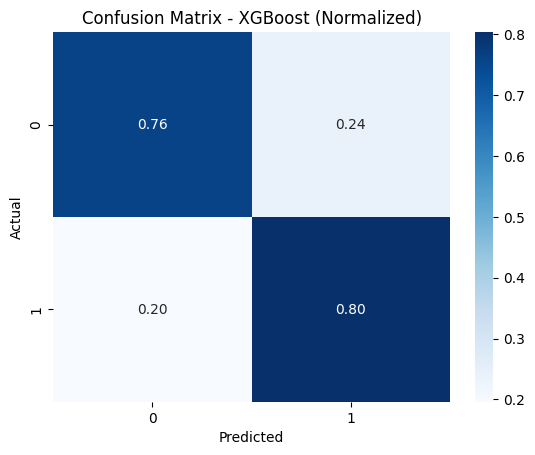

In [15]:
from sklearn.metrics import confusion_matrix

best_model_name = best_model['Model'] 

def plot_confusion_matrix(y_true, y_pred, model_name, normalize=False):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f' if normalize else 'd', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}' + (' (Normalized)' if normalize else ''))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_test, y_pred, best_model_name, normalize=True)

## Model Comparison

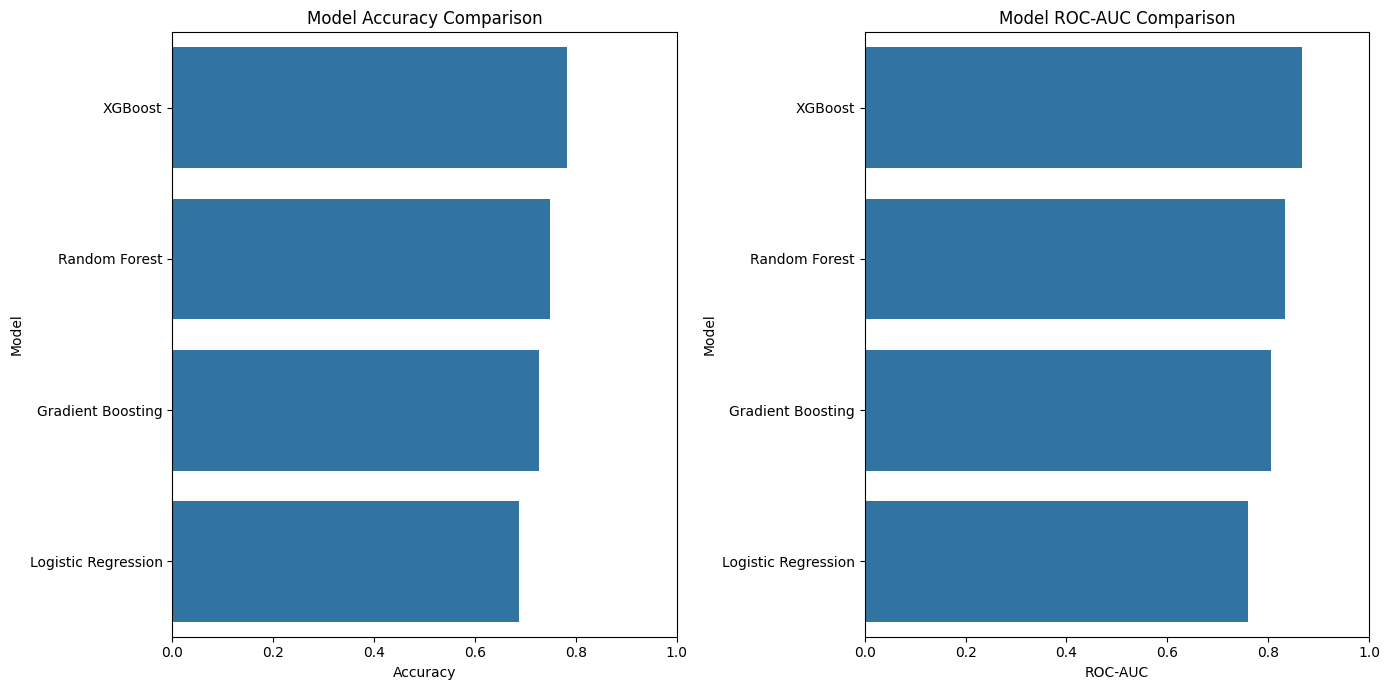

In [16]:
plt.figure(figsize=(14, 7))

# Bar plot for accuracy comparison
plt.subplot(1, 2, 1)
sns.barplot(x='Accuracy', y='Model', data=results_df.sort_values('Accuracy', ascending=False))
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.xlim(0, 1)

# ROC-AUC comparison
plt.subplot(1, 2, 2)
sns.barplot(x='ROC-AUC', y='Model', data=results_df.sort_values('ROC-AUC', ascending=False))
plt.title('Model ROC-AUC Comparison')
plt.xlabel('ROC-AUC')
plt.xlim(0, 1)

plt.tight_layout()
plt.show()

## Saving best model

In [18]:
import pickle

# Save the actual trained model  
best_trained_model = models[best_model_name]  

# Save models properly
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_trained_model, f)

with open('word2vec_model.pkl', 'wb') as f:
    pickle.dump(w2v_model, f)